###              LAPTOP PRICE PREDICTION PROJECT

In [2]:
# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Load dataset 
df = pd.read_csv("C:\\Users\\marin\\Jupyter Notebooks\\Laptop Price Prediction\\Laptop_price.csv")

In [6]:
# Inspect the first & the last rows of the dataset 
print("\t\tFirst 10 Rows Of The Dataset\n")
print(df.head(10))
print("\n\n\n\t\tLast 10 Rows Of The Dataset\n")
print(df.tail(10))

		First 10 Rows Of The Dataset

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   
5      HP         1.881348        16               256    11.943958  4.840268   
6  Lenovo         2.940721        32               256    11.713246  4.344846   
7  Lenovo         3.016788         4               256    15.588315  2.941120   
8  Lenovo         2.560327         4               512    15.026332  2.743620   
9    Acer         3.341111        32               512    13.611945  4.093149   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  1

In [8]:
# Normalize column names 
df.columns = df.columns.str.lower().str.replace(" ", "_")
print(df.columns)

Index(['brand', 'processor_speed', 'ram_size', 'storage_capacity',
       'screen_size', 'weight', 'price'],
      dtype='object')


In [12]:
# Check for missing values and duplicated values 
print("Missing Values By Column\n")
print(df.isna().sum())

print("\n\nDuplicated Rows\n")
print(df.duplicated().sum())

Missing Values By Column

brand               0
processor_speed     0
ram_size            0
storage_capacity    0
screen_size         0
weight              0
price               0
dtype: int64


Duplicated Rows

0


In [15]:
# Get descriptive statistics for for numerical variables of the dataset 
print("\t\tDescriptive Statistics For Numeric Variables\n")
print(df.describe())

		Descriptive Statistics For Numeric Variables

       processor_speed     ram_size  storage_capacity  screen_size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790   
std           0.731796    10.988665        313.438517     1.705882   
min           1.511580     4.000000        256.000000    11.012111   
25%           2.089246     8.000000        256.000000    12.635523   
50%           2.760885    16.000000        512.000000    14.099643   
75%           3.362610    32.000000       1000.000000    15.528590   
max           3.998534    32.000000       1000.000000    16.985737   

            weight         price  
count  1000.000000   1000.000000  
mean      3.466919  19604.187963  
std       0.866541   9406.064880  
min       2.000560   8570.012950  
25%       2.717211  10114.012948  
50%       3.464630  17287.241878  
75%       4.212583  31566.214754  
max       4.990728  33503.935037  


In [16]:
# Get descriptive statistics for for categorical variables of the dataset 
print("\t\tDescriptive Statistics For Categorical Variables\n")
print(df.describe(include=['object']))

		Descriptive Statistics For Categorical Variables

       brand
count   1000
unique     5
top     Dell
freq     210


In [17]:
# Extract numerical variables of the dataset in a variable 
numeric_data = df.select_dtypes(include=['number'])

In [18]:
# Inspect if correlations between numeric variables are present 
print("\t\tCorrelation Table For Numerical Variables\n")
print(numeric_data.corr())

		Correlation Table For Numerical Variables

                  processor_speed  ram_size  storage_capacity  screen_size  \
processor_speed          1.000000  0.021391         -0.067576    -0.013425   
ram_size                 0.021391  1.000000          0.002111    -0.036002   
storage_capacity        -0.067576  0.002111          1.000000    -0.027560   
screen_size             -0.013425 -0.036002         -0.027560     1.000000   
weight                  -0.054603 -0.025382          0.041335     0.021995   
price                   -0.050737  0.061237          0.997908    -0.026740   

                    weight     price  
processor_speed  -0.054603 -0.050737  
ram_size         -0.025382  0.061237  
storage_capacity  0.041335  0.997908  
screen_size       0.021995 -0.026740  
weight            1.000000  0.038417  
price             0.038417  1.000000  


In [20]:
# Inspect if correlations between numeric variables and `price` are present 
print("\t\tCorrelation Table For Numerical Variables & Price\n")
print(numeric_data.corr()['price'].sort_values(ascending=False))

		Correlation Table For Numerical Variables & Price

price               1.000000
storage_capacity    0.997908
ram_size            0.061237
weight              0.038417
screen_size        -0.026740
processor_speed    -0.050737
Name: price, dtype: float64


In [21]:
# Check the average `price` for each `brand` 
print("Average Price For Each Brand\n")
print(df.groupby('brand')['price'].mean().sort_values(ascending=False))

Average Price For Each Brand

brand
Acer      19984.613620
Lenovo    19974.929725
Asus      19854.238277
HP        19369.762930
Dell      18866.009978
Name: price, dtype: float64


In [22]:
# Check the frequency of different `ram_size` for each `brand` 
print("Frequency Of Different RAM Sizes For Each Brand\n")
print(df.groupby('ram_size')['brand'].value_counts().sort_values(ascending=False))

Frequency Of Different RAM Sizes For Each Brand

ram_size  brand 
32        Dell      67
8         Asus      66
4         HP        59
32        Acer      59
          Lenovo    58
16        Dell      52
8         Lenovo    51
4         Acer      50
16        HP        49
4         Dell      48
8         Acer      48
4         Asus      47
16        Asus      47
          Acer      47
32        Asus      46
          HP        44
8         Dell      43
16        Lenovo    42
4         Lenovo    39
8         HP        38
Name: count, dtype: int64


In [24]:
# Check the frequency of each `brand` 
print("Frequency Of Each Laptop Brand\n")
print(df['brand'].value_counts().sort_values(ascending=False))

Frequency Of Each Laptop Brand

brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


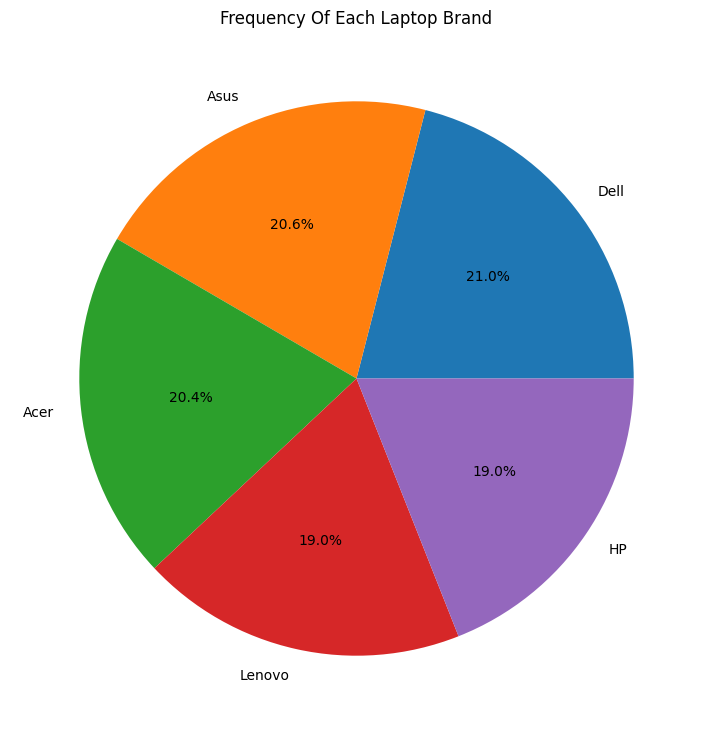

In [26]:
brand_freq = df['brand'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18,9))
plt.pie(brand_freq.values, labels=brand_freq.index, autopct='%1.1f%%')
plt.title("Frequency Of Each Laptop Brand")
plt.show()

In [30]:
# Extract the predictors variables and the predicted into X and y variables
X = df[['processor_speed', 'ram_size', 'storage_capacity']]
y = df['price']

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regression Model 
rfr_model = RandomForestRegressor()

In [46]:
from sklearn.model_selection import GridSearchCV

# Create parameters grid dictionary 
param_grid = {
    "max_depth": [2,5,10,15,20,25],
    "max_features": ['auto', 'log2'],
    "n_estimators": [2,4,6,8,10,12] 
}

In [47]:
# Initialize Grid Search CV 
grid_fr = GridSearchCV(rfr_model, param_grid)

In [48]:
# Train the model 
grid_fr.fit(X_train, y_train)

C:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 4, 6, 8, 10, 12]})

In [49]:
# Extract the best prediction parameters 
grid_fr.best_params_

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 10}

In [50]:
# Make predictions for the test set 
predictions = grid_fr.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error 

# Extract the mean absolute error 
mean_absolute_error(y_test, predictions)

402.33827305634327

In [52]:
# Create web app to make predictions 
import joblib 

# Export the model 
joblib.dump(grid_fr, "rf_model.pkl")

['rf_model.pkl']